# Zomato Restaurant

### Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:

* Country code
* Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

* Restaurant Id: Unique id of every restaurant across various cities of the world
* Restaurant Name: Name of the restaurant
* Country Code: Country in which restaurant is located
* City: City in which restaurant is located
* Address: Address of the restaurant
* Locality: Location in the city
* Locality Verbose: Detailed description of the locality
* Longitude: Longitude coordinate of the restaurant&#39;s location
* Latitude: Latitude coordinate of the restaurant&#39;s location
* Cuisines: Cuisines offered by the restaurant
* Average Cost for two: Cost for two people in different currencies ��
* Currency: Currency of the country
* Has Table booking: yes/no
* Has Online delivery: yes/ no
* Is delivering: yes/ no
* Switch to order menu: yes/no
* Price range: range of price of food
* Aggregate Rating: Average rating out of 5
* Rating color: depending upon the average rating color
* Rating text: text on the basis of rating of rating
* Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


## Import necessary libaraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
# Import zomato.csv file
df1 = pd.read_csv('zomato.csv',encoding='utf-8', encoding_errors='ignore')

# Import Country-Code.xlsx
df2 = pd.read_excel('Country-Code.xlsx')

In [3]:
# Checking the first dataframe
print('No. of rows :',df1.shape[0])
print('No. of columns :',df1.shape[1])

df1.head()

No. of rows : 9551
No. of columns : 21


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Checking the second dataframe
print('No. of rows :',df2.shape[0])
print('No. of columns :',df2.shape[1])
pd.set_option('display.max_columns',None)

df2.head()

No. of rows : 15
No. of columns : 2


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


**We seee that the datasets they have Country Code in both dataset, So we use pandas merge operation to combine two datasets**

In [5]:
# Merging those datasets
df = pd.merge(df1,df2)

In [6]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('Display.max_columns',None)

df.head()

No. of Rows : 9551
No. of Columns : 22


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [7]:
# Checking the columns in the dataset
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [8]:
# Checking the name,its dtype and its count of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

We see that there are float64(3),int(5) object(14) and some columms has missing values. 

In [9]:
# Checking the duplicates values
df.duplicated().sum()

0

We observe that there are duplicated value present in the dataset.

In [10]:
# Let check if any whitespace, 'NA' or '-', qustion mark exist in dataset.
df.isin([' ','-','?']).sum().any()

False

We cannot any find whitespace, 'NA' or '-', qustion mark.

In [11]:
# Checking missing values in the dataset
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

We  can see only one (Cuisines) columns has missing values. We fill those values using  city columns.

In [12]:
# Filling missing values in Cuisines column
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [13]:
# Checking missing value again
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
# Checking the unique values of each column
df.nunique().to_frame('No of unique values')

,No of unique values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [15]:
# Checking the value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64
**************************************************
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64
**************************************************
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64
**************************************************
City
New Delhi       54

In [16]:
# Drop unwanted columns
df = df.drop(columns=['Restaurant ID','Restaurant Name','Address','Locality Verbose'])

df.shape

(9551, 18)

## Description of Dataset

In [17]:
# Statistical summary of numerical columns
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


From the above description we can observe the following :-
 1. The count of all the columns are same which means there are no missing values in the dataset.
 2. The mean values is greater than the median (50%) in country code, Average Cost for two, Votes.
 3. Te mean values is less than the median (50%) in Longitude, Latitude, Average Cost for two, Price range, Price range, Aggregate rating,.
 4. By summarizing the data we can osberve there is huge differences between 75% and max hence there are outliers present in the data.
 5. We can also notice the Standard deviation, min, 25% percentile values.

### Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

## Data Visualization

### Univariate Analysis

### Visualize Price range Target column

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


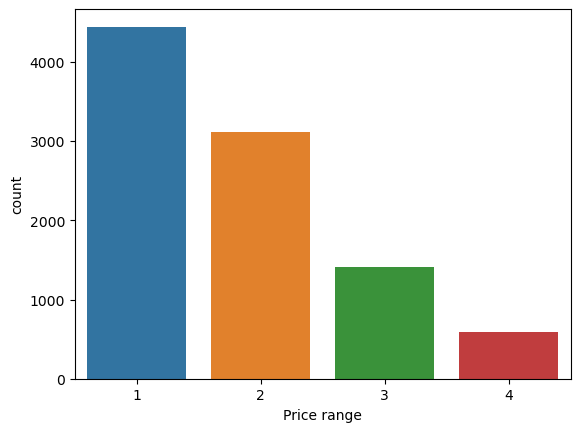

In [18]:
# Visualize the count of Price range target columns 
print(df['Price range'].value_counts(normalize=True)*100)

sns.countplot(x='Price range',data=df)
plt.show()

We can observe that there are 4 class so this is multiclass classification problem, The leads to class imbalance issue in the data. We will rectify it by using oversampling method in later part.

## Visualize Average Cost for two Target column

(array([9.531e+03, 4.000e+00, 7.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([     0.,  80000., 160000., 240000., 320000., 400000., 480000.,
        560000., 640000., 720000., 800000.]),
 <BarContainer object of 10 artists>)

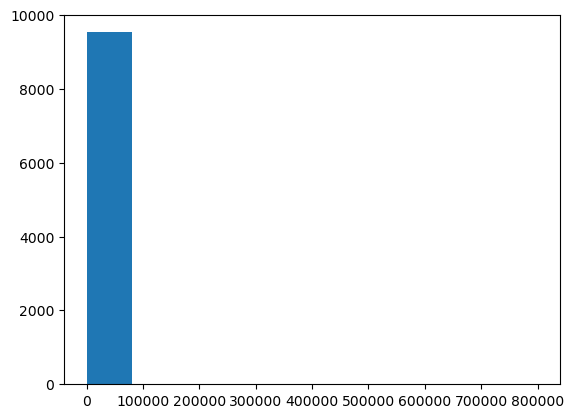

In [19]:
# Visualize the count of Average Cost for two target columns 
plt.hist(x='Average Cost for two',data=df)

Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64


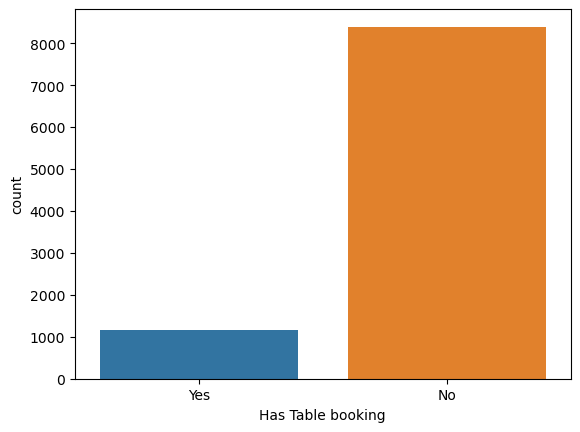

In [20]:
# Visuaize the count of Has Table booking columns
print(df['Has Table booking'].value_counts(normalize=True)*100)

sns.countplot(x='Has Table booking',data=df)
plt.show()

Here Yes is represent Has Table booking and No is not table booking. The count of NO is very high compared to Yes.

Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


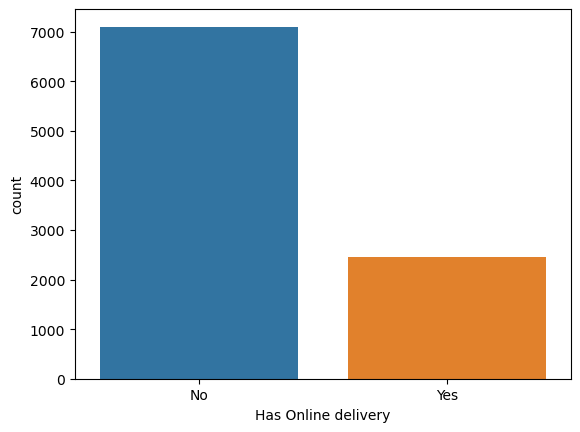

In [21]:
# Visuaize the count of Has Online delivery columns
print(df['Has Online delivery'].value_counts(normalize=True)*100)

sns.countplot(x='Has Online delivery',data=df)
plt.show()

The count of which restaurant has not delviery online it very high then they delivery online.

Is delivering now
No     99.644016
Yes     0.355984
Name: proportion, dtype: float64


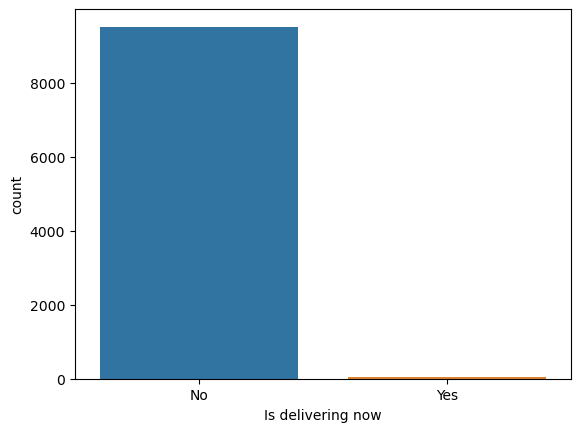

In [22]:
# Visuaize the count of Is delivering now columns
print(df['Is delivering now'].value_counts(normalize=True)*100)

sns.countplot(x='Is delivering now',data=df)
plt.show()

The count of which restaurant they have do delviering now is very less amost 0.35% compare then those have no delviering now.

Switch to order menu
No    100.0
Name: proportion, dtype: float64


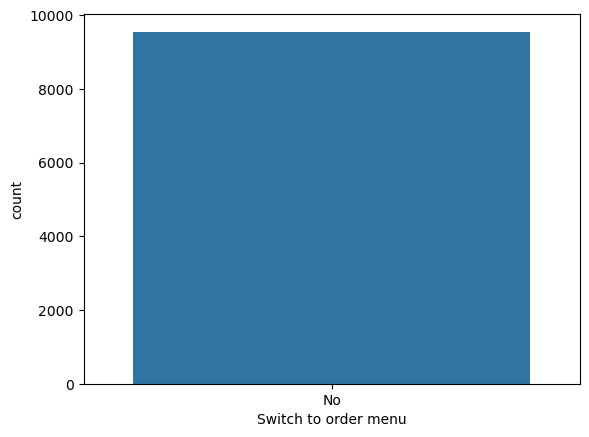

In [23]:
# Visuaize the count of Switch to order menu columns
print(df['Switch to order menu'].value_counts(normalize=True)*100)

sns.countplot(x='Switch to order menu',data=df)
plt.show()

The colums switch to order menu has only one class that No.

Rating color
Orange        39.126793
White         22.489792
Yellow        21.987226
Green         11.297246
Dark Green     3.151502
Red            1.947440
Name: proportion, dtype: float64


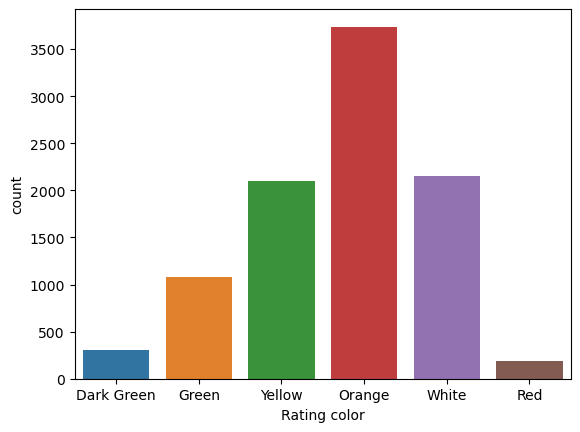

In [24]:
# Visuaize the count of Rating color columns
print(df['Rating color'].value_counts(normalize=True)*100)

sns.countplot(x='Rating color',data=df)
plt.show()

The count of rating color is Orange is very and Yellow and white is almost same. other has very less compare to Orange.

Rating text
Average      39.126793
Not rated    22.489792
Good         21.987226
Very Good    11.297246
Excellent     3.151502
Poor          1.947440
Name: proportion, dtype: float64


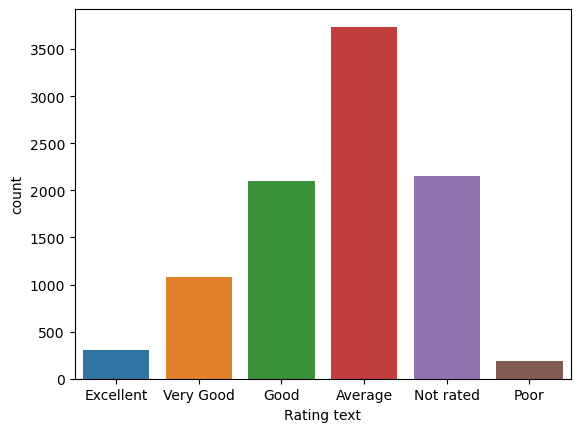

In [25]:
# Visuaize the count of Rating text columns
print(df['Rating text'].value_counts(normalize=True)*100)

sns.countplot(x='Rating text',data=df)
plt.show()

The count of Rating Average is very high then Good and Not rated then Very Good is less but Excellent and Poor is very less.
**Rating text and rating color are almost same but different is class name.**

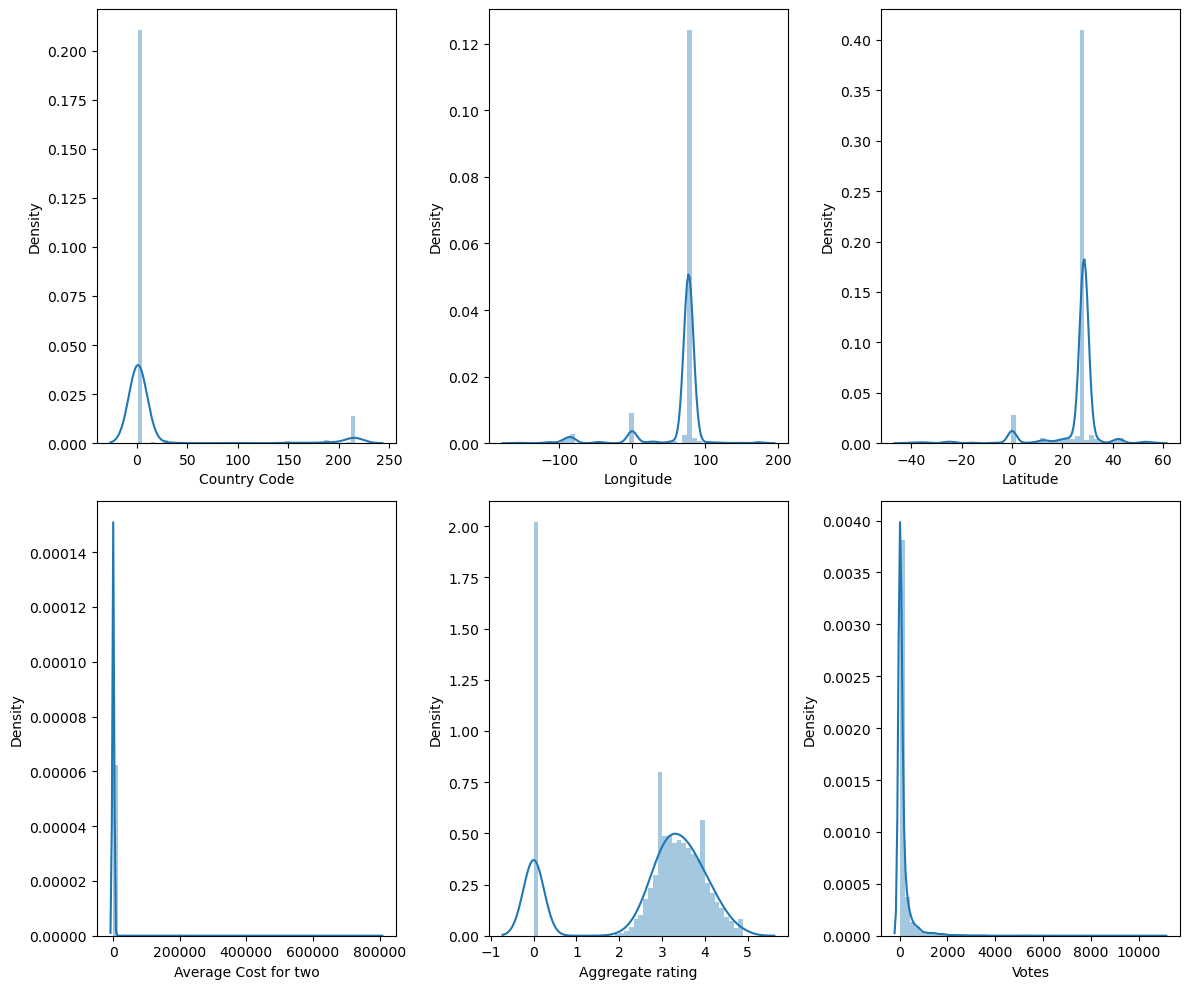

In [26]:
numerical = ['Country Code','Longitude','Latitude','Average Cost for two','Aggregate rating','Votes']

# Let's  check how the data has been distributed in numerical columns
plt.figure(figsize=(12,10),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data not looks normal in all the columns.

### Bivariate Analysis

### Comparing feature vs Price range target columns

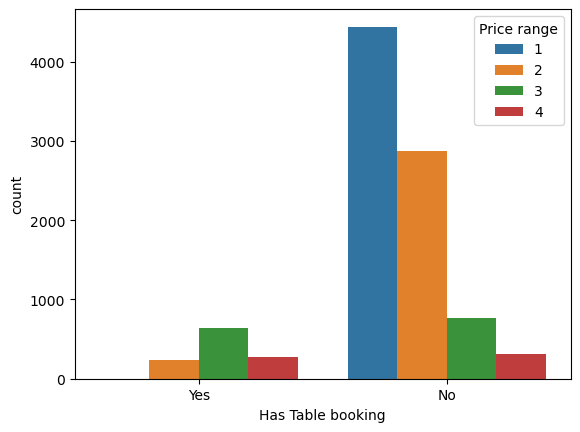

In [27]:
# comparing Has Table booking	Has Online t  vs Price range target columns
sns.countplot(x='Has Table booking',hue='Price range',data=df)
plt.show()

When Has No Table booking when the high chance of Price range is 1 and 2.

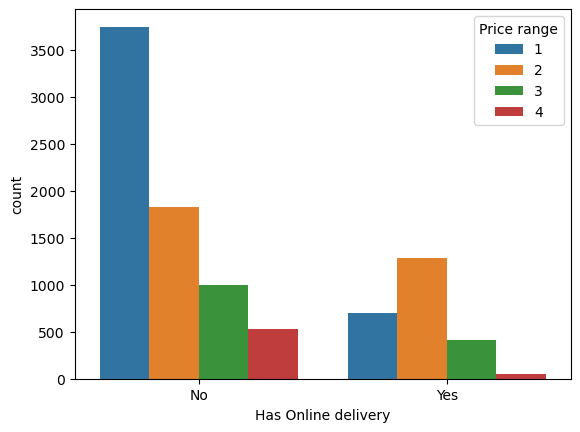

In [28]:
# comparing Has Online delivery vs Price range target columns
sns.countplot(x='Has Online delivery',hue='Price range',data=df)
plt.show()

When the restaurant has No online delivery then Price range high chance of price range is 1

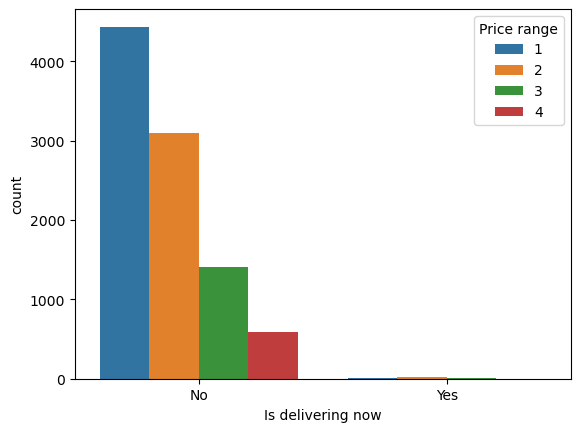

In [29]:
# comparing HIs delivering now vs Price range target columns
sns.countplot(x='Is delivering now',hue='Price range',data=df)
plt.show()

When diliveriing now has No so price range is 1,2

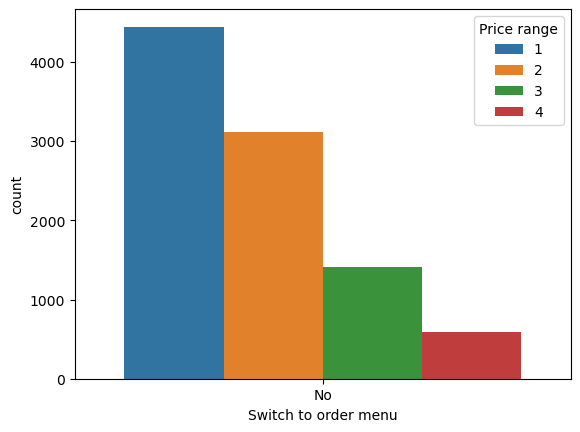

In [30]:
# comparing Switch to order menu vs Price range target columns
sns.countplot(x='Switch to order menu',hue='Price range',data=df)
plt.show()

In his only one class and they have in decesring order.

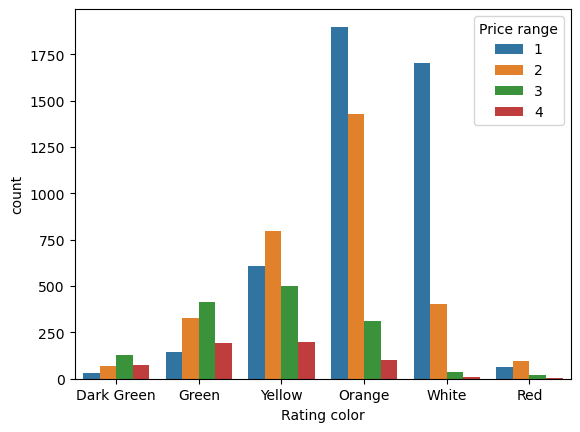

In [31]:
# comparing Rating color vs Price range target columns
sns.countplot(x='Rating color',hue='Price range',data=df)
plt.show()

We see that rating color and rating text are same so we observe rating text.

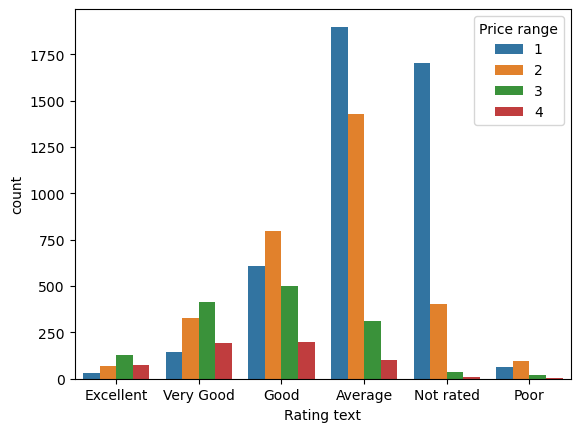

In [32]:
# comparing Rating text vs Price range target columns
sns.countplot(x='Rating text',hue='Price range',data=df)
plt.show()

We observe that the Rating is Average then high chance of price range is 1,2 and Good rating is price range is 1,2 is high chance. 

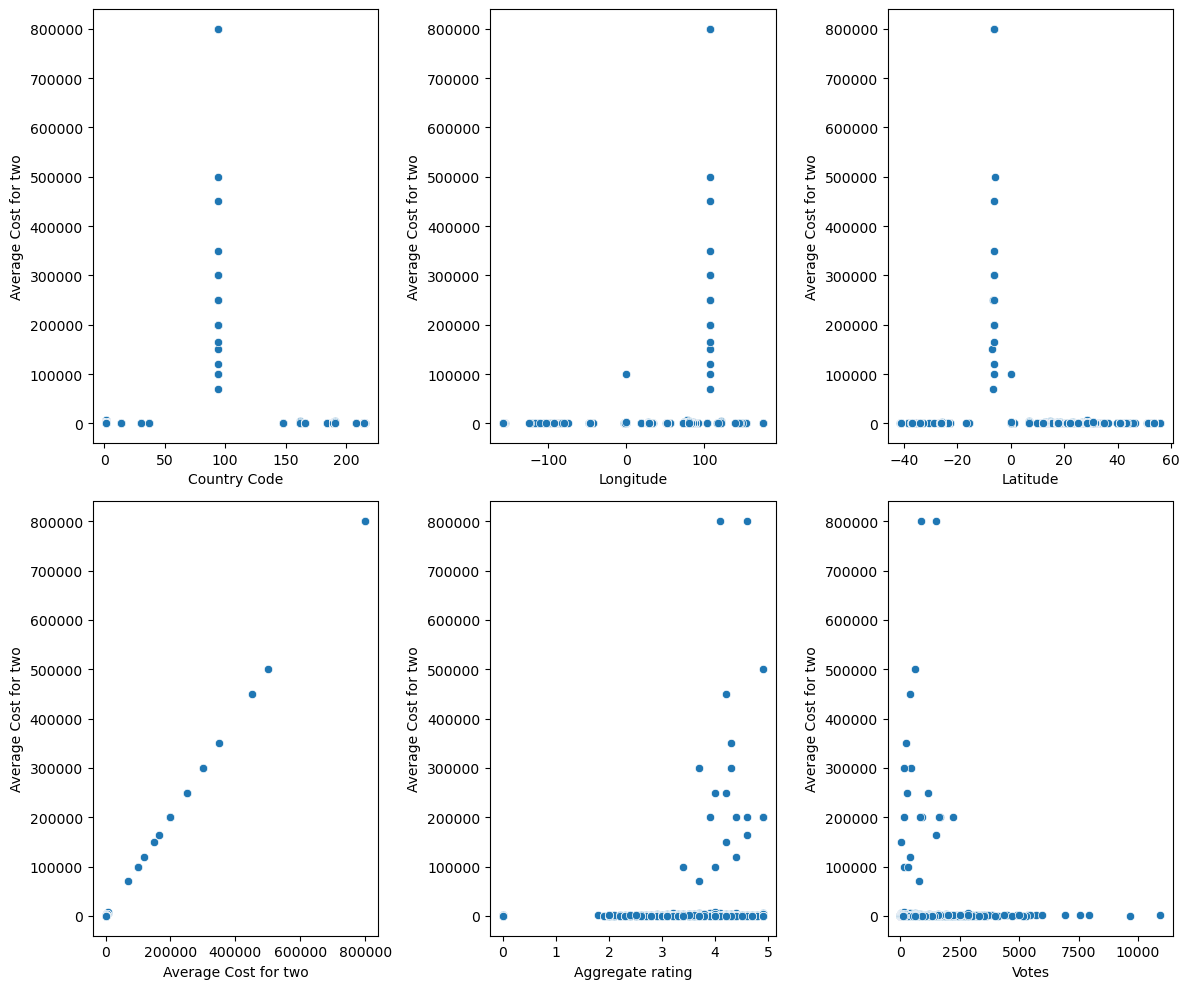

In [33]:
plt.figure(figsize=(12,10),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.scatterplot(x=col,y='Average Cost for two',data=df)
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

We  see the relationship but we not say strong linear relationship.

### Multivariate Analysis

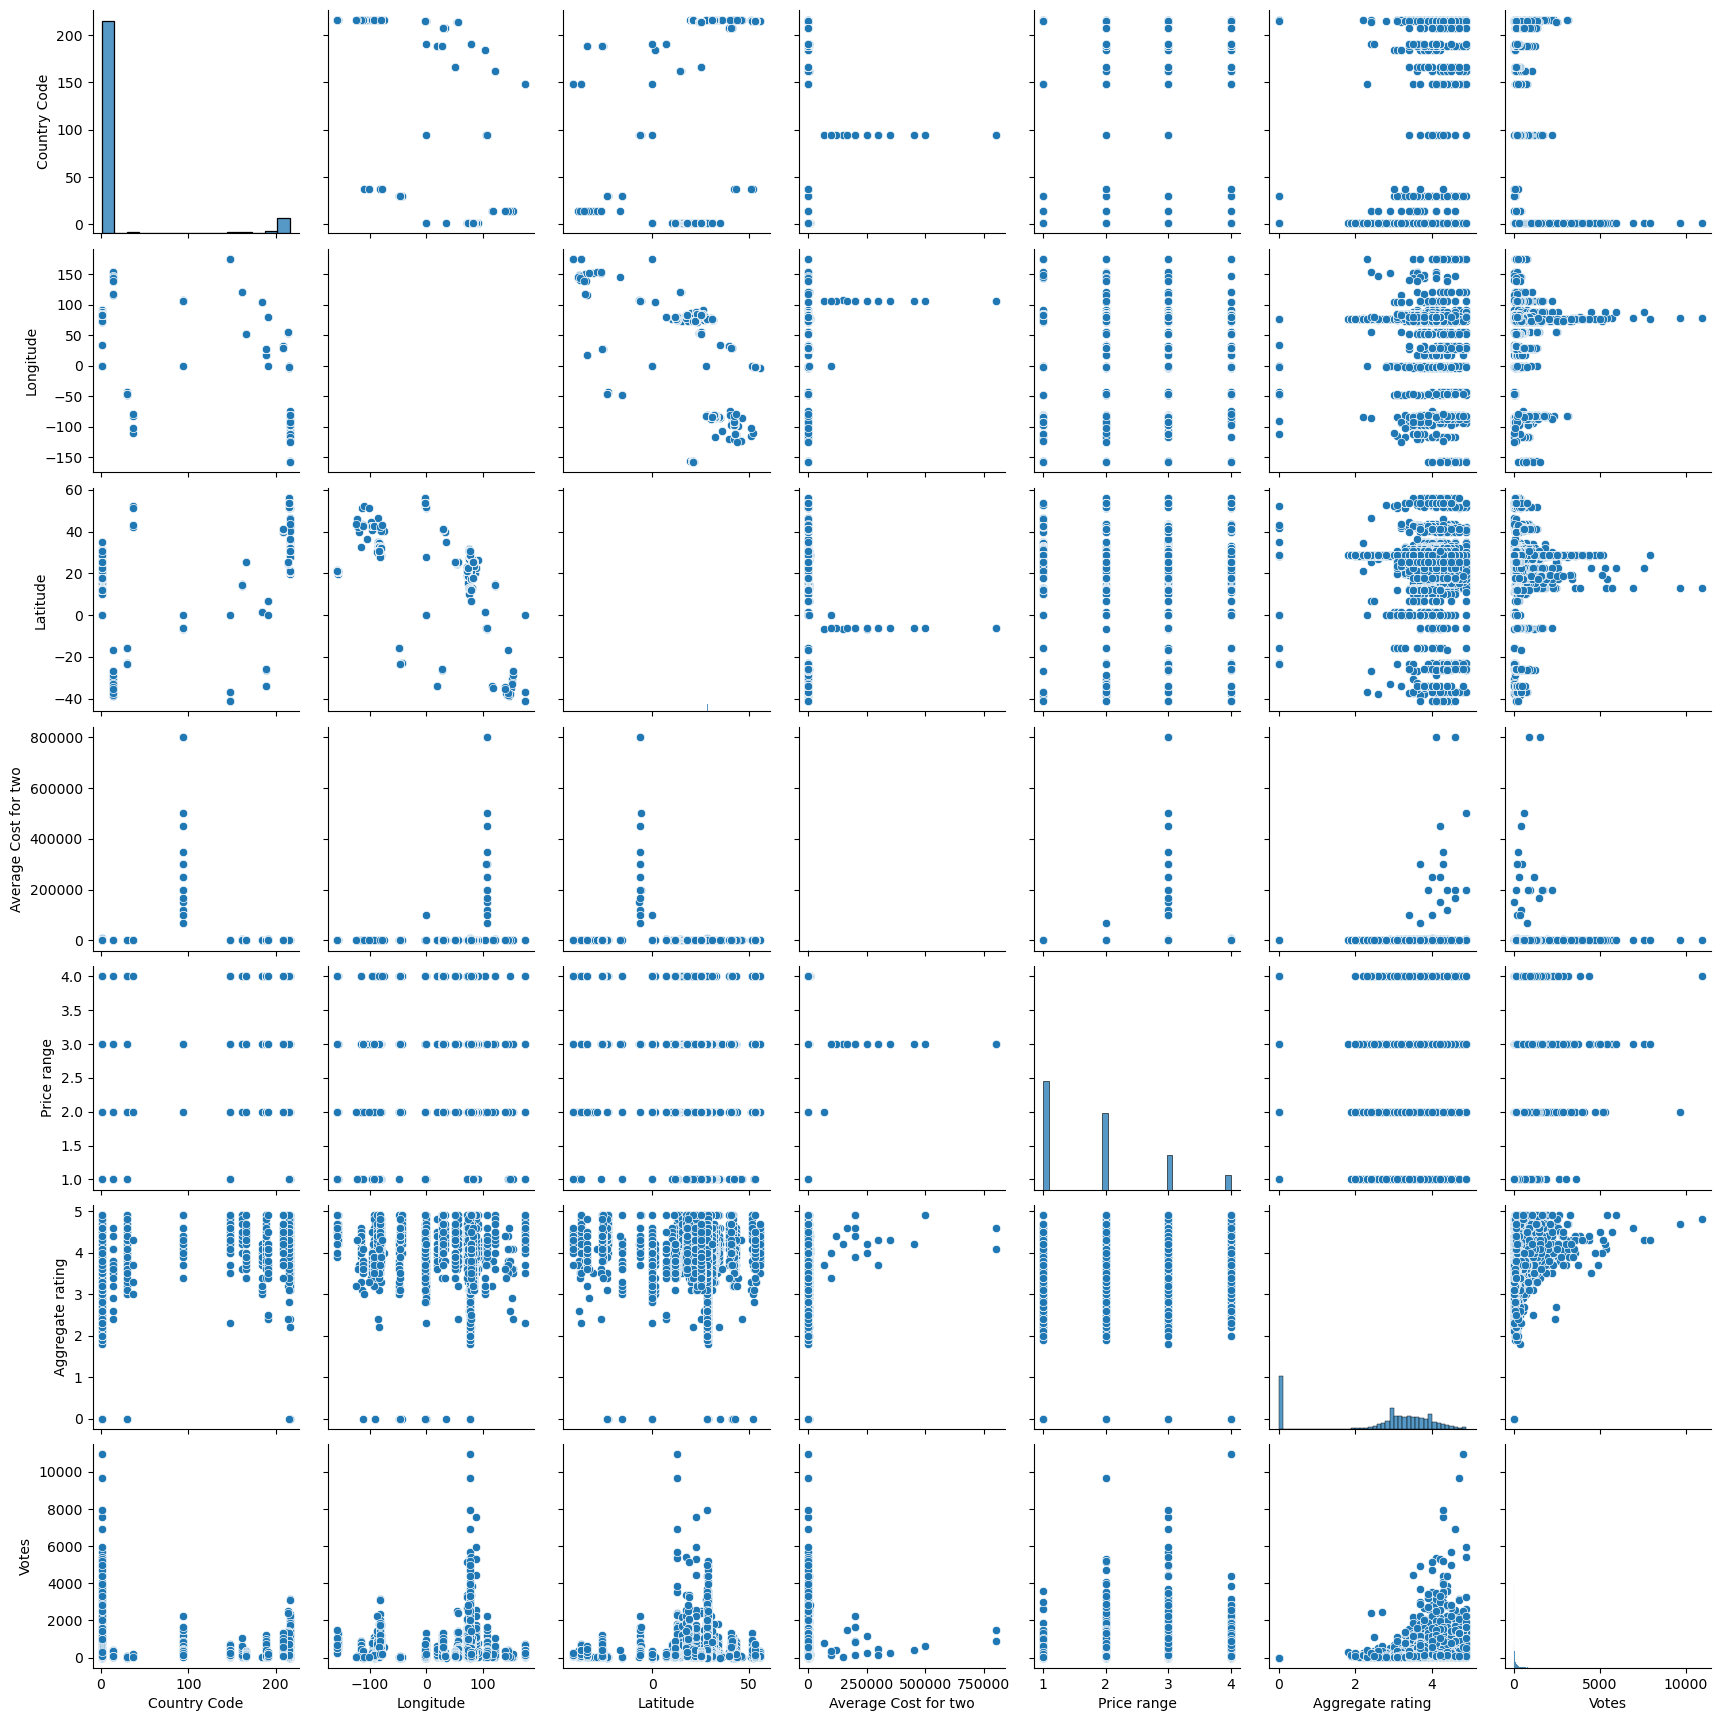

In [34]:
sns.pairplot(df)
plt.show()

The pairplot gives the pairwise relationship between the features.

In [35]:
# Drop unwanted columns
df = df.drop(columns=['Country Code','Longitude','Latitude','Rating color'])

df.head()

,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314,Phillipines
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591,Phillipines
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Very Good,270,Phillipines
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Excellent,365,Phillipines
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Excellent,229,Phillipines


## Identify Outliers

<Axes: >

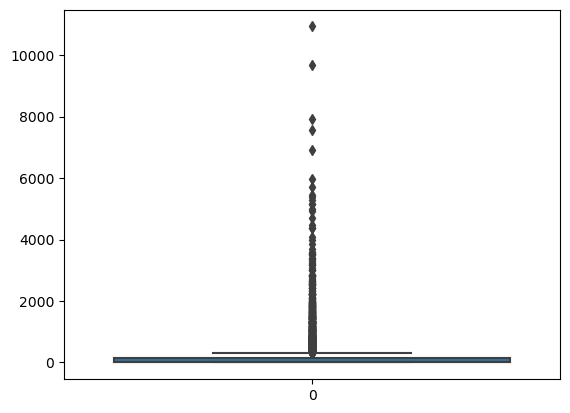

In [36]:
# Checking the outliers using boxplot

sns.boxplot(df['Votes'])

We see there are outliers present in the votes columns.

## Outliers Detection and removel

### Checking outliers using zscore method

In [37]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore
df_feature = df[['Votes']]

z = np.abs(zscore(df_feature))            # Apply the formula and get the scaled data

df1 = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  9551
New Data Frame -  9378

Data Loss Percentage After removing outliers with zscore method -
  1.8113286566851639


### Checking outliers using IQR method

In [38]:
# 1st quantile 
Q1 = df_feature.quantile(0.25)

# 3rd quantile
Q3 = df_feature.quantile(0.75)

#
IQR = Q3 - Q1

df2 = df[~((df_feature<(Q1 - 1.5 * IQR)) | (df_feature>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  9551
New Data Frame -  8425

Data Loss Percentage After removing outliers with zscore method -
  11.78934143021673


In [39]:
# reassigning the changed dataframe name to our original dataframe name
df = df1

df.shape

(9378, 14)

We use zscore method because its Loss less data then IQR method.

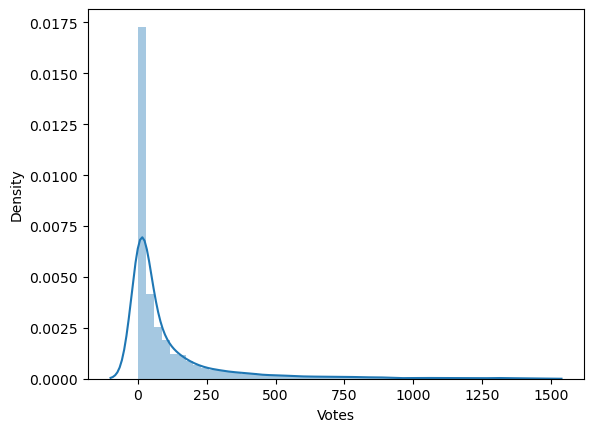

In [40]:
# Checking the distribution of the Votes columns and skewnes
sns.distplot(df['Votes'])
plt.show()

The columns has skewness in the data. So we can remove skewness.

## Checking the skewness

In [41]:
# Checking the skewnees of Votes column
df['Votes'].skew()

3.199653474078209

In [42]:
# Rmove the skewness
from scipy.stats import boxcox
df['Votes'] = boxcox(df['Votes'],0.3)
df['Votes'].skew()

0.4987173401666798

Rmove the skewness using boxcox method.

## Encoding categorical columns

#### Encoding Rating text categorical columns using OridnalEncoder

In [43]:
# Encoding Rating text categorical columns using OridnalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder(categories=[['Not rated','Poor','Average','Good','Very Good','Excellent']])

df['Rating text'] = OE.fit_transform(df['Rating text'].values.reshape(-1,1))
        
df.head()

,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,5.0,15.371664,Phillipines
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,5.0,19.279500,Phillipines
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,4.0,14.543388,Phillipines
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,5.0,16.235575,Phillipines
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,5.0,13.681566,Phillipines


#### Encoding pther categorical columns using LabelEncoder

In [44]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
OE = LabelEncoder()

for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country
0,73,163,886,1100,0,1,0,0,0,3,4.8,5.0,15.371664,6
1,73,574,1070,1200,0,1,0,0,0,3,4.5,5.0,19.279500,6
2,75,297,1620,4000,0,1,0,0,0,4,4.4,4.0,14.543388,6
3,75,834,1085,1500,0,0,0,0,0,4,4.9,5.0,16.235575,6
4,75,834,1081,1500,0,1,0,0,0,4,4.8,5.0,13.681566,6


In [45]:
# Checking the datatype of all the columns after impliment enconding technique
df.dtypes

City                      int32
Locality                  int32
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating text             float64
Votes                   float64
Country                   int32
dtype: object

**We convert price range in multiclass classification because it has only 4 class.**

In [46]:
df['Price range'] = df['Price range'].replace({1:0,2:1,3:2,4:3})

In [47]:
df['Price range'].value_counts()

Price range
0    4437
1    3076
2    1312
3     553
Name: count, dtype: int64

# Correlation

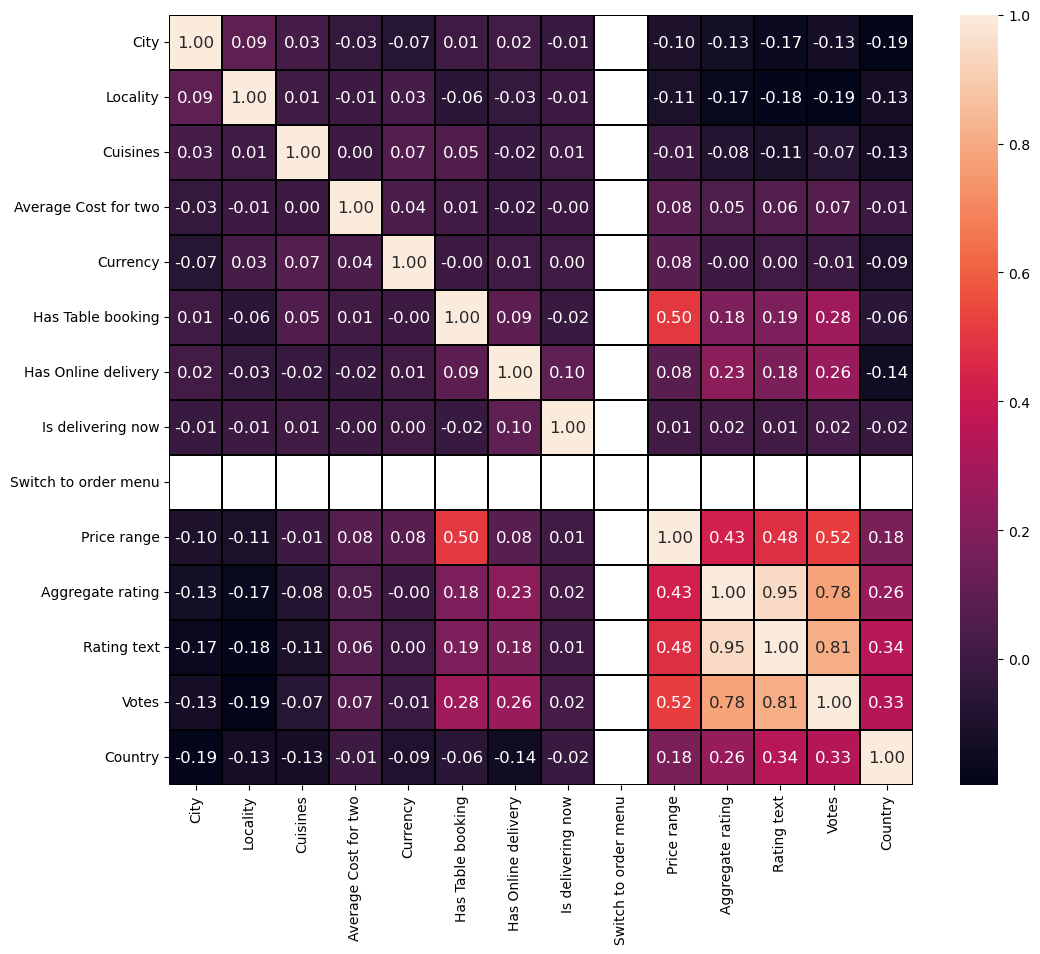

In [48]:
# Checking the correlation between features vs features and feature vs target
df_corr = df.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

This heamap contains both positive and negative correlation. There is no much postive and negative correlation. We see some features has strong linear relationship betweent them.

 1. The columns Switch to order menu has high correlated with all the columns.
 2. Ratting text is high correlated with Aggregate rating.
 3. There is no much negative correlated.

In [49]:
# Let's Drop Switch to order menu column which highly corerated all other columns
# Drop Aggregate rating column which correlated with rating text
df = df.drop(columns=['Switch to order menu','Aggregate rating'],axis=1)

df.shape

(9378, 12)

### We Create first Classification model where target columns is Price range.

### Correlation between feature vs classification target

In [50]:
df_corr['Price range'].drop('Price range').sort_values(ascending=False)

Votes                   0.515240
Has Table booking       0.502386
Rating text             0.477209
Aggregate rating        0.428015
Country                 0.179695
Currency                0.080998
Has Online delivery     0.077641
Average Cost for two    0.075211
Is delivering now       0.012516
Cuisines               -0.005991
City                   -0.103350
Locality               -0.106433
Switch to order menu         NaN
Name: Price range, dtype: float64

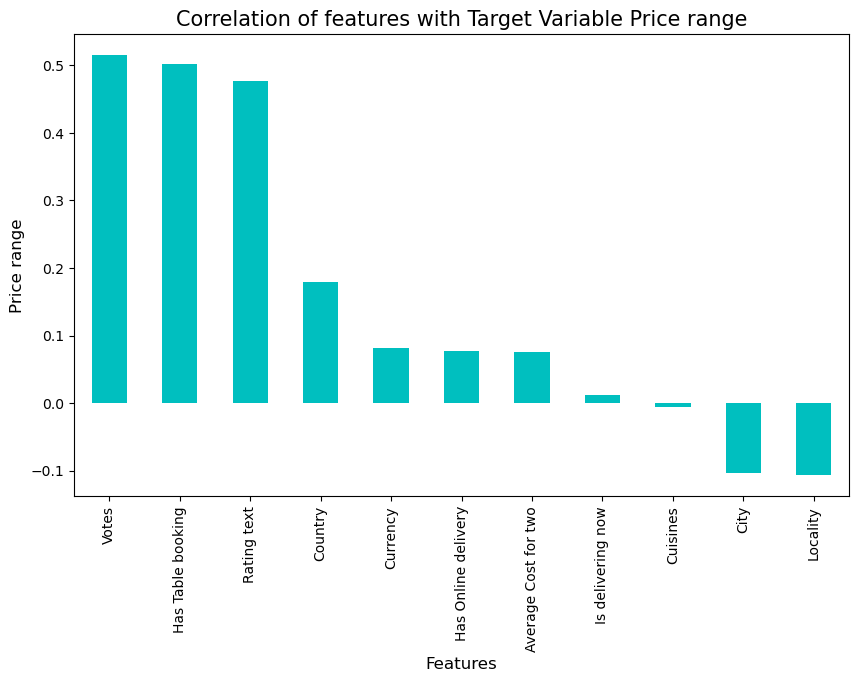

In [51]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['Price range'].drop(['Price range']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Price range',fontsize=12)
plt.title('Correlation of features with Target Variable Price range',fontsize = 15)
plt.show()

* Is delivering now and Cuisines features are poorly or moderately correlated with Price range target variable. 
* Maximum correlated columns is Votes, Has Table booking with Price range taget variable.

## Sparating features and target

In [52]:
x = df.drop(columns=['Price range'],axis=1)
y = df['Price range']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (9378, 11)
Shape of y  (9378,)


Price range
0    4437
1    3076
2    1312
3     553
Name: count, dtype: int64


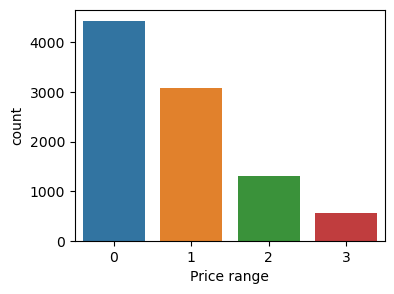

In [53]:
# Checking the count of target columns
print(y.value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x=y)
plt.show()

## Feature Scaling using Standard Scalarization

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(9378, 11)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [55]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF values
0,City,1.063835
1,Locality,1.050372
2,Cuisines,1.030269
3,Average Cost for two,1.010497
4,Currency,1.023768
5,Has Table booking,1.121383
6,Has Online delivery,1.159650
7,Is delivering now,1.011960
8,Rating text,3.030410
9,Votes,3.321595


There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [56]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [57]:
maxAccu = 0
maxRs = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu*100,"at random_state", maxRs)  

Best accuracy is  98.37953091684435 at random_state 32


### Creating train test split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRs)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (7033, 11)
The shape of y_train  (7033,)
The shape of x_test   (2345, 11)
The shape of y_test   (2345,)


### Applying all Classification Model

In [59]:
LR  = LogisticRegression()
KNN = KNeighborsClassifier()
DT  = DecisionTreeClassifier()
ET  = ExtraTreeClassifier()
RFC = RandomForestClassifier()
BC  = BaggingClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC(probability=True)
XGB = xgb.XGBClassifier()

models = {'LogisticRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFC,
         'Bagging':BC,'AdaBoost':ABC,'GradientBoosting':GBC,'SVC':SVM,'XGBoost':XGB}

In [60]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('\n\033[1m'+'Classification ML Algorithm model is',name,'\033[0m\n')

    print('\033[1m'+'Accuracy Score :'+'\033[0m', acc_score)
    
    print('\n\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    
    print('\n\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    
    print('****************************************************************************************')


Classification ML Algorithm model is LogisticRegression 

Accuracy Score : 0.6699360341151386

Confusion matrix : 
 [[985 109  15   0]
 [310 384  74   5]
 [ 16 105 184  12]
 [ 21  31  76  18]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      1109
           1       0.61      0.50      0.55       773
           2       0.53      0.58      0.55       317
           3       0.51      0.12      0.20       146

    accuracy                           0.67      2345
   macro avg       0.60      0.52      0.53      2345
weighted avg       0.65      0.67      0.65      2345

****************************************************************************************

Classification ML Algorithm model is KNeighbors 

Accuracy Score : 0.6315565031982943

Confusion matrix : 
 [[899 201   8   1]
 [337 374  56   6]
 [ 31  99 165  22]
 [ 15  28  60  43]]

Classification Report : 
               precision    recall  f1-scor

# Cross Validation

In [61]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    
    score = cross_val_score(model, x, y, cv =5)

    print('\n\033[1m'+'Cross Validation Score', name, ':'+'\033[0m\n')
    print("Score          :" ,score)
    print("Mean Score     :",score.mean())
    print('Accuracy Score :',acc_score)
        
    final = acc_score - score.mean()
    print('\nDifferent between Accuracy vs Cross Val Score: ',final)
    
    print('\n***********************************************************************************')


Cross Validation Score LogisticRegression :

Score          : [0.50479744 0.65031983 0.70948827 0.69866667 0.60693333]
Mean Score     : 0.6340411087420043
Accuracy Score : 0.6699360341151386

Different between Accuracy vs Cross Val Score:  0.03589492537313432

***********************************************************************************

Cross Validation Score KNeighbors :

Score          : [0.25586354 0.32356077 0.44402985 0.60373333 0.5792    ]
Mean Score     : 0.4412774982231699
Accuracy Score : 0.6315565031982943

Different between Accuracy vs Cross Val Score:  0.19027900497512434

***********************************************************************************

Cross Validation Score DecisionTree :

Score          : [0.42803838 0.92270789 0.99626866 0.99253333 0.8304    ]
Mean Score     : 0.8339896517412935
Accuracy Score : 0.9812366737739872

Different between Accuracy vs Cross Val Score:  0.1472470220326937

*************************************************************

**We can see that AdaBoost gives less error between accuracy score and CrossValidation.**


* Score          : [0.69296375 0.83102345 0.80117271 0.85866667 0.77653333]
* Mean Score     : 0.7920719829424308
* Accuracy Score : 0.835820895522388

* Different between Accuracy vs Cross Val Score:  0.04374891257995728

## Hyper Parameter Tuning : GridSearchCV

### Tune the parameter with AdaBoost model

In [62]:
ABC.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01,0.03],
               'algorithm'    : ['SAMME', 'SAMME.R'],
               'n_estimators' :  [100,500]}

GCV = GridSearchCV(estimator = ABC, param_grid=param_grid)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  AdaBoostClassifier(algorithm='SAMME', learning_rate=0.03, n_estimators=500)


Best score :  0.8923660502607872


## Final Model

In [64]:
model = GCV.best_estimator_
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('\033[1m'+' Final Model :' +'\033[0m')
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

 Final Model :
Accuracy Score 0.9044776119402985

Confusion matrix :
 [[1109    0    0    0]
 [  76  695    2    0]
 [  44   25  244    4]
 [  46    4   23   73]]

Classification report :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1109
           1       0.96      0.90      0.93       773
           2       0.91      0.77      0.83       317
           3       0.95      0.50      0.65       146

    accuracy                           0.90      2345
   macro avg       0.92      0.79      0.84      2345
weighted avg       0.91      0.90      0.90      2345



### Saving the model

In [65]:
import joblib
joblib.dump(model,'Zomator_Restaurent_Price_range.pkl')

['Zomator_Restaurent_Price_range.pkl']

### Predicting the saved model

In [66]:
# Let's load the saved model and get the predictions
model = joblib.load("Zomator_Restaurent_Price_range.pkl")

# Prediction 
prediction = model.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

# We Create first Regression model where target column is Average Cost for two.

### Correlation between feature vs regression target

In [67]:
df_corr['Average Cost for two'].drop('Average Cost for two').sort_values(ascending=False)

Price range             0.075211
Votes                   0.071562
Rating text             0.064498
Aggregate rating        0.048369
Currency                0.041341
Has Table booking       0.013597
Cuisines                0.000368
Is delivering now      -0.001501
Country                -0.005540
Locality               -0.007641
Has Online delivery    -0.016010
City                   -0.029248
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

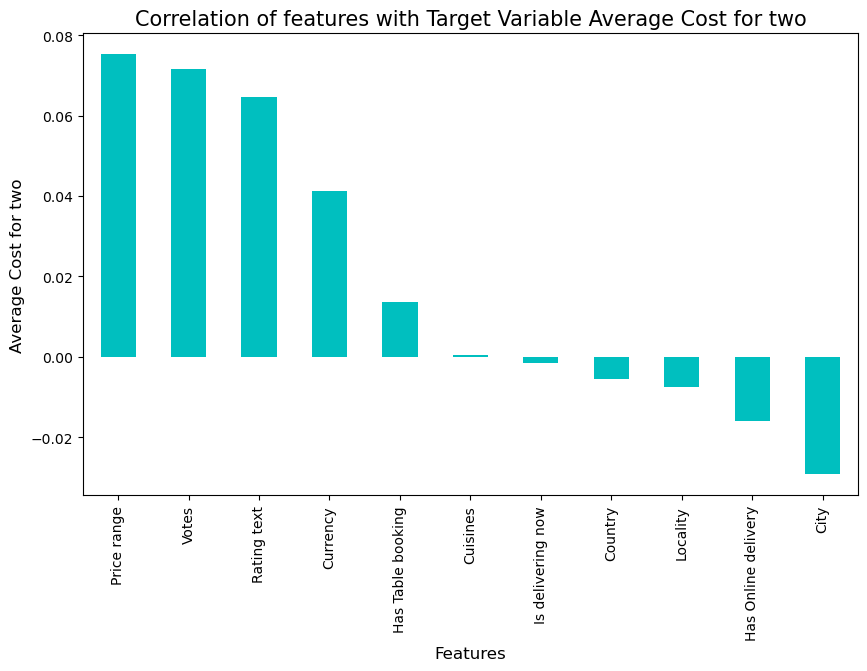

In [68]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['Average Cost for two'].drop(['Average Cost for two']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Average Cost for two',fontsize=12)
plt.title('Correlation of features with Target Variable Average Cost for two',fontsize = 15)
plt.show()

* Culisines and Is delivering now features are poorly or moderately correlated with Average Cost for two target variable.
* Maximum correlated are Price Range, Votes, Rating text with Average Cost for two taget variable.

## Sparate feature and target

In [69]:
x = df.drop(columns=['Average Cost for two'],axis=1)
y = df['Average Cost for two']

print('Shape of X ',x.shape)
print('Shape of y ',y.shape)

Shape of X  (9378, 11)
Shape of y  (9378,)


### Feature Scaling using Standard Scalarization

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(9378, 11)

### Checking Variance Inflation Factor (VIF)

In [71]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF values
0,City,1.064556
1,Locality,1.050378
2,Cuisines,1.030485
3,Currency,1.035582
4,Has Table booking,1.417808
5,Has Online delivery,1.161995
6,Is delivering now,1.012452
7,Price range,1.774848
8,Rating text,3.098263
9,Votes,3.413929


There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [72]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [73]:
# Find the best ranom state 
maxAcc = 0
maxRS  = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('The  Best accuracy score is',maxAcc,' on best random state is',maxRS)

The  Best accuracy score is 0.022546296264719157  on best random state is 75


### Creating train test split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (7033, 11)
The shape of y_train  (7033,)
The shape of x_test   (2345, 11)
The shape of y_test   (2345,)


### Applying all Regression Model

In [75]:
LR  = LinearRegression()
L1 = Lasso()
L2 = Ridge(alpha=0.01)
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor()
BC  = BaggingRegressor()
ABR = AdaBoostRegressor()
GBR = GradientBoostingRegressor()
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFR,
         'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,'SVR':SVM,'XGBoost':XGB,'Lasso':L1,'Ridge':L2}

### Applying all the models 

In [76]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\033[1m'+'Error of',name,'\033[0m')
    print('Mean absolute error      :',mean_absolute_error(y_test,y_pred))
    print('Mean squared error       :',mean_squared_error(y_test,y_pred))
    print('Root mean squared error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score '+'\033[0m')
    print(r2_score(y_test,y_pred))
    print('*************************************************************************\n')

Error of LinearRegression 
Mean absolute error      : 1469.8820636363498
Mean squared error       : 126567464.38553438
Root mean squared error  : 11250.220637193494


R2 Score 
0.022546296264719157
*************************************************************************

Error of KNeighbors 
Mean absolute error      : 544.5544562899787
Mean squared error       : 75508908.7654243
Root mean squared error  : 8689.586225213736


R2 Score 
0.41686070036962153
*************************************************************************

Error of DecisionTree 
Mean absolute error      : 610.3373489694386
Mean squared error       : 115170059.29367359
Root mean squared error  : 10731.731421055672


R2 Score 
0.11056604031265271
*************************************************************************

Error of ExtraTree 
Mean absolute error      : 754.1543354655296
Mean squared error       : 140784164.35461888
Root mean squared error  : 11865.25028621895


R2 Score 
-0.08724626462080254
*********

## Cross Validation

In [77]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    score = cross_val_score(model,x,y,cv = 5)
    print('\033[1m',name,'\033[0m\n')
    print('R2 Score                       :',accuracy_score)
    print('Cross Validation Score         :',score)
    print('Mean of Cross Validation Score :',score.mean())
    
    final = accuracy_score - score.mean()
    print('\nDifferent between R2 Score vs Cross Validaton Score :',final)
    print('********************************************************************************\n')

 LinearRegression 

R2 Score                       : 0.022546296264719157
Cross Validation Score         : [-1.15603662e+02 -1.09478117e+01 -3.00934213e+00 -8.36720843e-01
 -1.52324205e-03]
Mean of Cross Validation Score : -26.079812028174114

Different between R2 Score vs Cross Validaton Score : 26.102358324438832
********************************************************************************

 KNeighbors 

R2 Score                       : 0.41686070036962153
Cross Validation Score         : [-4.16477831e+02 -1.41237804e+02  8.23758520e-01  6.36822354e-01
 -3.37056763e-03]
Mean of Cross Validation Score : -111.25168492541052

Different between R2 Score vs Cross Validaton Score : 111.66854562578014
********************************************************************************

 DecisionTree 

R2 Score                       : -0.3504953035500673
Cross Validation Score         : [ 0.44760642  0.4781346   0.76619088  0.73561098 -0.00333701]
Mean of Cross Validation Score : 0.4848411726

#### We can see that GradientBoosting gives less error between accuracy score and CrossValidation.


### Hyper paramter tuning : GridSearchCV

#### Tune the parameter with GradientBoosting model

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid ={'learning_rate': [0.01,0.02,0.03],
             'subsample'    : [0.9,0.5,0.1],
             'n_estimators' : [250,500],
             'max_depth'    : [4,8,12]}

GCV = GridSearchCV(estimator = GBR, param_grid=param_grid, n_jobs = -1, verbose=5)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best estimator :  GradientBoostingRegressor(learning_rate=0.01, max_depth=12, n_estimators=250,
                          subsample=0.9)


Best score :  0.684409818440143


## Final Model

In [79]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 546.0286335785823
Mean squared error : 87900000.43530135
Root Mean Squared Error: 9375.500009882211


 R2 Score of Final Model :
0.3211669254737962




 Actual Values Vs Predicted Value plot :


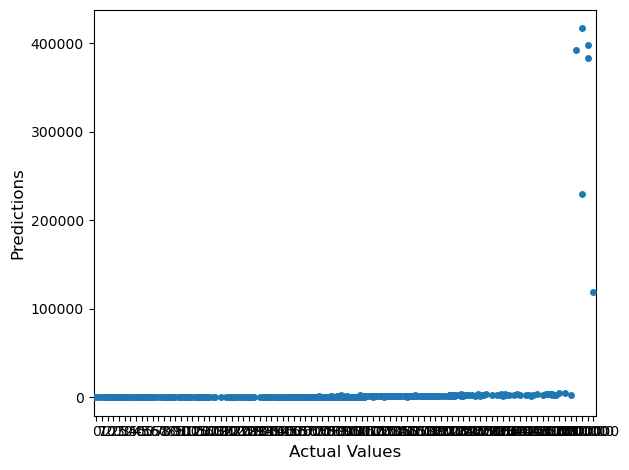

In [80]:
y_pred=Final_mod.predict(x_test)
sns.swarmplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

### We try all the model all the method and also check remove some columns. any think not work.

### Saving Model

In [81]:
import pickle
filename = 'Zomato_Restaurant_Average_Cost_for_two.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

### Predicting the saved model

In [82]:
import pickle
loaded_model = pickle.load(open('Zomato_Restaurant_Average_Cost_for_two.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

32.11669254737962


In [83]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021